**What is Exploratory Data Analysis?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more which I will be using in my dataset.

**What Data we are exploring now?**

Exploratory data analysis of the Dialysis Facility Centers Listing based on various factors like rating, location and many others.

**Data Set**: Dialysis_Facility_Compare_-_Listing_by_Facility.csv

**Source**: https://catalog.data.gov/dataset/dialysis-facility-compare-listing-by-facility-f711e

**Description**: It is a list of all dialysis facilities registered with Medicare that includes addresses and phone numbers, as well as services and quality of care provided.

**Size**: The data source size is 7.4 MB and also includes different types of entries like string, int, float with 7627 rows and 120 columns.

**Legality and Cost**: The Dataset is free to download and legal to access as well.

**Documented EDA**: There is no EDA or Visualization available on the web for this Dataset.

**Hypothesis**:
*   Around 90% of dialysis centres are profitable and very few are non-profitable.

**Conclusion:** Yes, my visualisation below supports the above hypothesis and results are proved with analysis in this notebook.
*   Only 30% of hospitals offer hemodialysis training in home.

**Conclusion:** Yes, my visualisation below supports the above hypothesis and results are proved with analysis in this notebook.
*   There are more number of dialysis centres in california state.

**Conclusion:** No, my visualisation below contradicts the above hypothesis and analysed that texas has more number of dialysis centers in this notebook.

*   Around 25% of dialysis centres have five star ratings.


 **Primary conclusions**:
*   Around 90% of dialysis centres are profitable and very few are non-profitable.
*   Only 30% of hospitals offer hemodialysis training in home.
*   There are more number of dialysis centres in Texas state.
*   Around 25% of dialysis centres have five star ratings and the data set had few centers which didnt provide rating for those centers.

**Learnt from Project 2:**
* Different visualization techniques
* Using functions in pandas
* Understanding dataset considering many factors



 


**Importing necessary libraries**

In [0]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns # for visualisation
import matplotlib.pyplot as plt # for visualisation
from matplotlib.pyplot import figure
from itertools import cycle, islice
%matplotlib inline 
sns.set(color_codes=True)

**Reading Dialysis_Facility_Compare_-_Listing_by_Facility csv data as Dataframe using pandas**

In [0]:
df = pd.read_csv('https://data.medicare.gov/api/views/23ew-n7w9/rows.csv?accessType=DOWNLOAD')

**Using shape, able to identify the size of the data frame which gives in the format of (rows,columns)**

In [9]:
df.shape

(7626, 119)

**Identifying the data types of all the columns in the dataframe**

In [10]:
df.dtypes

Provider Number                                 int64
Network                                         int64
Facility Name                                  object
Five Star Date                                 object
Five Star                                      object
                                                ...  
95% C.I. (upper limit) for PPPW                object
95% C.I. (lower limit) for PPPW                object
Number of patients for PPPW                    object
Percentage of Prevalent Patients Waitlisted    object
Location                                       object
Length: 119, dtype: object

**Using head function, identifying the first rows of the data frame**

In [11]:
df.head() 

,Provider Number,Network,Facility Name,Five Star Date,Five Star,Five Star Data Availability Code,Address Line 1,Address Line 2,City,State,Zip,County,Phone Number,Profit or Non-Profit,Chain Owned,Chain Organization,Late Shift,# of Dialysis Stations,Offers in-center hemodialysis,Offers peritoneal dialysis,Offers home hemodialysis training,Certification or Recertification Date,Claims Date,CROWNWeb Date,STrR Date,Percentage of Medicare patients with Hgb<10 g/dL,HGB<10 data availability code,Percentage of Medicare patients with Hgb>12 g/dL,Hgb > 12 data availability code,Number of Dialysis Patients with Hgb data,Patient Transfusion data availability Code,Patient Transfusion category text,Number of patients included in the transfusion summary,Percent of Adult HD patients with Kt/V >= 1.2,Adult HD Kt/V data availability code,Percentage of Adult PD PTS with Kt/V >= 1.7,Adult PD Kt/V Data Availability Code,Percentage of Pediatric HD patients with Kt/V >= 1.2,Pediatric HD Kt/V Data Availability Code,Number of Adult HD patients with Kt/V data,...,Pediatric PD Kt/V Data Availability Code,Number of pediatric PD patient-months with KT/V data,Percentage of pediatric PD patients with Kt/V>=1.8,SIR Date,Patient Infection Data Availability Code,Patient Infection category text,Standard Infection Ratio,SIR: Upper Confidence Limit (97.5%),SIR: Lower Confidence Limit (2.5%),Transfusion Rate (Facility),Transfusion Rate: Upper Confidence Limit (97.5%),Transfusion Rate: Lower Confidence Limit (2.5%),Fistula data availability code,Fistula Category Text,Number of Patients included in fistula summary,Fistula Rate (Facility),Fistula Rate: Upper Confidence Limit (97.5%),Fistula Rate: Lower Confidence Limit (2.5%),Number of patients in long term catheter summary,Number of patient months in long term catheter summary,Long term catheter Data Availability Code,Percentage of Adult patients with long term catheter in use,Number of patients in nPCR summary,Number of patient-months in nPCR summary,nPCR Data Availability Code,Percentage of pediatric HD patients with nPCR,DATE_SWR,SWR category text,Patient transplant waitlist data availability code,95% C.I. (upper limit) for SWR,95% C.I. (lower limit) for SWR,Number of patients in this facility for SWR,Standardized First Kidney Transplant Waitlist Ratio,PPPW category text,Patient prevalent transplant waitlist data availability code,95% C.I. (upper limit) for PPPW,95% C.I. (lower limit) for PPPW,Number of patients for PPPW,Percentage of Prevalent Patients Waitlisted,Location
0,12630,8,DAVITA WIREGRASS KIDNEY CENTER,01/01/2015 - 12/31/2018,3,1,1450 ROSS CLARK CIRCLE,SUITE 200,DOTHAN,AL,36301,HOUSTON,(334) 792-8907,Profit,True,DAVITA,False,20,True,False,False,12/23/2008,07/01/2018 - 06/30/2019,07/01/2018 - 06/30/2019,01/01/2018 - 12/31/2018,24,1,0,1,38,1,As Expected,53,96,1,Not Available,257,Not Available,259,72,...,259,Not Available,Not Available,01/01/2018 - 12/31/2018,1,As Expected,1.18,2.84,.37,24.8,90.8,8.2,1,As Expected,79.0,57.6,78.5,35.1,79,696,1,6,0,Not Available,259,Not Available,01/01/2015 - 12/31/2017,As Expected,1,2.19,.15,41,.75,As Expected,1,31.6,2,79,8.9,"1450 ROSS CLARK CIRCLE DOTHAN, AL 36301"
1,32502,15,DAVITA YUMA DIALYSIS,01/01/2015 - 12/31/2018,3,1,2130 W 24TH ST,NaN,YUMA,AZ,85364,YUMA,(928) 783-2365,Profit,True,DAVITA,False,30,True,True,False,06/28/1978,07/01/2018 - 06/30/2019,07/01/2018 - 06/30/2019,01/01/2018 - 12/31/2018,10,1,0,1,146,1,As Expected,204,99,1,98,1,Not Available,259,207,...,259,Not Available,Not Available,01/01/2018 - 12/31/2018,1,Better than Expected,.5,.99,.22,34.2,60.6,21,1,As Expected,222.0,65.9,77.9,53,222,2037,1,13,0,Not Available,259,Not Available,01/01/2015 - 12/31/2017,As Expected,1,2.06,.4,72,1,As Expected,1,26.9,8.7,239,15.8,"2130 W 24TH ST YUMA, AZ 85364"
2,52819,17,SATELLITE DIALYSIS SAN MATEO,01/01/2015 - 12/31/2018,5,1,2000 SOUTH EL CAMINO REAL,NaN,SAN MATEO,CA,94403,SAN MATEO,(650) 377-0888,Non-Profit,True,SATELLITE HEALTHCARE,True,24,True,True,False,03/10/1998,07/

**Finding Number of Null values in data frame**

In [12]:
null_columns=df.columns[df.isnull().any()]  #Finding number of null values in each column
df[null_columns].isnull().sum()

Address Line 2                                            6539
Chain Organization                                           1
Number of patients in Serum phosphorus summary              71
Number of patient-months in Serum phosphorus summary       163
Number of patients included in hospitalization summary      74
Number of patients included in survival summary             74
Number of Patients included in fistula summary              71
dtype: int64

**Renaming the coulmn Names/Labels**

**This approach is done for better understanding which improves the readability of the data set.**

**Here, In this dataset:** 
*   from Five Star to Five_Star, it is the rating provided for the dialysis Centers
*   Offers home hemodialysis training, it specifies whether the center provides home training or not
*   Profit or Non-Profit, it specifies whether the center is for profit or not for profit.


In [0]:
df=df.rename(columns = {'Five Star':'Five_Star','Profit or Non-Profit':'Profit_NonProfit','Offers home hemodialysis training':"Offer_Home_dialysis"})

In [14]:
duplicated_rows = df[df.duplicated()]
print('number of duplicate rows: ', duplicated_rows.shape)

number of duplicate rows:  (0, 119)


**Here In this dataset, as we dont have any duplicate values there no change in the row count.**

**But, if we have duplicate values we can remove them, which is done mostly.**

**Using describe function**

**The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data**

In [15]:
df.describe()

,Provider Number,Network,Five Star Data Availability Code,Zip,# of Dialysis Stations,HGB<10 data availability code,Hgb > 12 data availability code,Patient Transfusion data availability Code,Adult HD Kt/V data availability code,Adult PD Kt/V Data Availability Code,Pediatric HD Kt/V Data Availability Code,Hypercalcemia Data Availability Code,Number of patients in Serum phosphorus summary,Number of patient-months in Serum phosphorus summary,Serum phosphorus Data Availability Code,Patient Hospitalization data availability Code,Patient Hospital Readmission data availability Code,Patient Survival data availability code,Number of patients included in hospitalization summary,Number of patients included in survival summary,Pediatric PD Kt/V Data Availability Code,Patient Infection Data Availability Code,Fistula data availability code,Number of Patients included in fistula summary,Long term catheter Data Availability Code,nPCR Data Availability Code,Patient transplant waitlist data availability code,Patient prevalent transplant waitlist data availability code
count,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7555.000000,7463.000000,7626.00000,7626.00000,7626.000000,7626.000000,7552.000000,7552.000000,7626.000000,7626.000000,7626.000000,7555.000000,7626.000000,7626.000000,7626.000000,7626.000000
mean,315876.077105,9.660372,31.525833,50297.359691,17.463284,31.839890,31.839890,41.090742,26.262392,170.362575,255.115132,13.552190,87.066314,753.179016,13.12300,25.68673,26.699449,30.239182,64.622484,251.310249,255.840808,41.942958,22.494099,78.452548,21.936271,254.674928,97.691975,14.793994
std,193257.685562,4.708672,83.403249,27581.675445,8.495540,75.349864,75.349864,87.672939,70.987742,108.505266,17.913859,52.313945,58.294605,522.367689,51.23718,74.10966,74.577879,79.229534,44.263213,185.960863,19.258111,88.145757,67.614074,54.087599,65.879543,20.264866,105.786322,55.649087
min,12306.000000,1.000000,1.000000,603.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,142822.250000,6.000000,1.000000,29533.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,259.000000,1.000000,46.000000,377.000000,1.00000,1.00000,1.000000,1.000000,34.000000,113.000000,259.000000,1.000000,1.000000,40.000000,1.000000,259.000000,1.000000,1.000000
50%,322545.500000,9.000000,1.000000,46032.000000,17.000000,1.000000,1.000000,1.000000,1.000000,201.000000,259.000000,1.000000,78.000000,661.000000,1.00000,1.00000,1.000000,1.000000,59.000000,228.000000,259.000000,1.000000,1.000000,72.000000,1.000000,259.000000,1.000000,1.000000
75%,452511.750000,14.000000,1.000000,76060.750000,22.000000,1.000000,1.000000,1.000000,1.000000,257.000000,259.000000,1.000000,117.000000,1018.000000,1.00000,1.00000,1.000000,1.000000,88.000000,353.000000,259.000000,1.000000,1.000000,108.500000,1.000000,259.000000,199.000000,1.000000
max,852568.000000,18.000000,261.000000,99801.000000,80.000000,258.000000,258.000000,258.000000,258.000000,258.000000,259.000000,258.000000,964.000000,5217.000000,258.00000,258.00000,258.000000,258.000000,654.000000,2115.000000,259.000000,258.000000,258.000000,928.000000,258.000000,259.000000,258.000000,258.000000


**Finding each rating's count for all the dialysis centers.**

In [16]:
df.Five_Star.value_counts()

3                2269
4                1937
5                1844
Not Available     901
2                 491
1                 184
Name: Five_Star, dtype: int64

**Finding the count for all the dialysis centers whether they are for profit or not for profit.**

In [17]:
df.Profit_NonProfit.value_counts()

Profit        6759
Non-Profit     867
Name: Profit_NonProfit, dtype: int64

**Finding the count for all the dialysis centers, for whether they provide home training or not.**

True specifies that they provide the training in home.

False specifies that they dont provide the training in home.

In [18]:
df.Offer_Home_dialysis.value_counts()

False    5414
True     2212
Name: Offer_Home_dialysis, dtype: int64

**Finding the count of the dialysis centers present in each state in US.**

In [19]:
df.State.value_counts()

TX    749
CA    706
FL    503
GA    376
OH    347
IL    345
PA    326
NY    324
NC    240
MI    220
VA    208
TN    205
NJ    192
LA    189
AL    186
IN    178
MD    173
MO    165
SC    159
AZ    128
WI    127
KY    126
MN    120
WA    100
MS     91
OK     89
MA     83
CO     80
OR     74
AR     71
IA     69
KS     65
NM     57
NV     52
CT     51
PR     50
UT     47
WV     46
NE     40
DE     33
HI     32
SD     28
ID     27
DC     22
NH     20
ME     19
MT     17
RI     16
ND     15
WY     10
AK      9
VT      8
GU      5
VI      4
MP      2
AS      2
Name: State, dtype: int64

**Hypothesis 1**: There are more number of dialysis centres in california state.

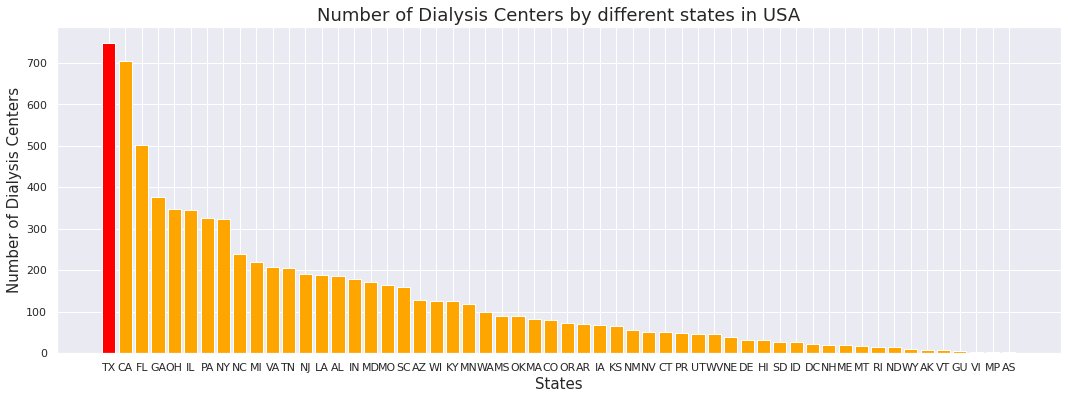

In [29]:
state_df=df.State.value_counts()

#plot the bar graph with different color to identify the highest number of dialysis centres
plt.figure(figsize=(18,6))
for i,v in state_df.iteritems():
    if i == 'TX':
        _=plt.bar(i,v,color='red')
    else:
        _=plt.bar(i,v,color='orange')

#Setting the titles, x and y labels        
_=plt.xlabel('States',fontsize=15)
_=plt.ylabel('Number of Dialysis Centers',fontsize=15)
_=plt.title('Number of Dialysis Centers by different states in USA',fontsize=18)
plt.show()

**No, Texas State has more number of Dialysis Centers followed by California State which contradicts my hypothesis 1**

**Hypothesis 2**: Around 90% of dialysis centres are profitable and very few are non-profitable.

In [21]:
data = (df.groupby(['State', 'Profit_NonProfit'])['Profit_NonProfit'].count()).unstack('Profit_NonProfit').fillna(0)
data

Profit_NonProfit,Non-Profit,Profit
State,,
AK,0.0,9.0
AL,19.0,167.0
AR,8.0,63.0
AS,1.0,1.0
AZ,10.0,118.0
CA,107.0,599.0
CO,4.0,76.0
CT,4.0,47.0
DC,2.0,20.0


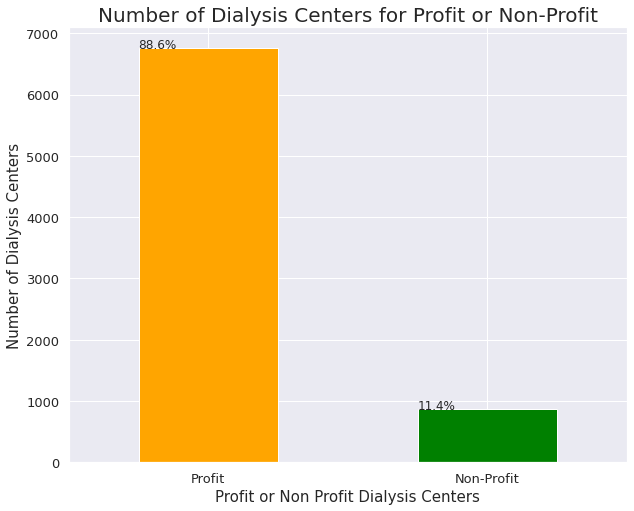

In [22]:
my_colors = list(islice(cycle(['orange','green']), None, len(df)))
ax = df.Profit_NonProfit.value_counts().plot(kind='bar', figsize=(10,8),color= my_colors, fontsize=13);
ax.set_xlabel('Profit or Non Profit Dialysis Centers', fontsize = '15')           # To set x axis label
ax.set_ylabel('Number of Dialysis Centers', fontsize = '15')  # To set y axis label
ax.set_title('Number of Dialysis Centers for Profit or Non-Profit', fontsize = '20')  # To set title 
ax.set_xticklabels(ax.get_xticklabels(),rotation='horizontal')
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
     width, height = i.get_width(), i.get_height()
     x, y = i.get_xy() 
     ax.annotate('{:.01%}'.format(height/total), (x, y + height + 0.01))

**Yes, there are many dialysis centres for profit and very few are not profit. 88.6% of the centers are for profit.Hence it supports my hypothesis 2 statement**

**Visualisation about the Dialysis Centers for profit or non-profit based on the states**

[]

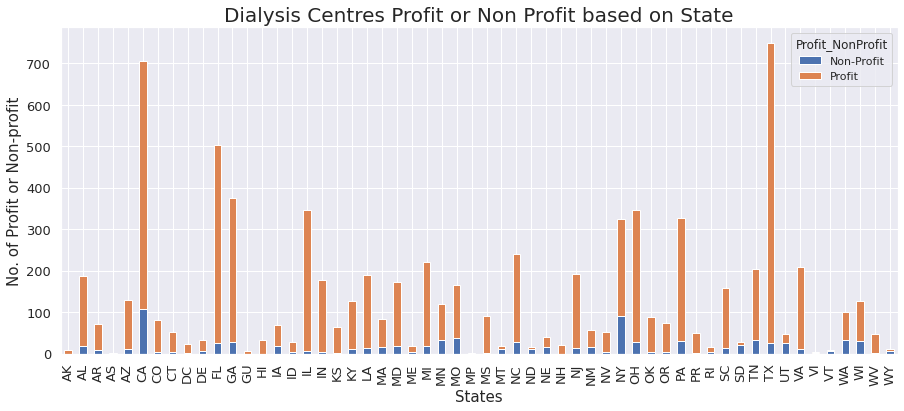

In [30]:
ax = data.plot(kind='bar', stacked = True, figsize=(15, 6), fontsize=13);
ax.set_xlabel('States', fontsize = '15')           # To set x axis label
ax.set_ylabel('No. of Profit or Non-profit', fontsize = '15')  # To set y axis label
ax.set_title('Dialysis Centres Profit or Non Profit based on State', fontsize = '20')  # To set title 
ax.plot()

**Hypothesis 3**: 30% of dialysis centres are Offer Home Dialysis.

In [24]:
data_1 = (df.groupby(['State', 'Offer_Home_dialysis'])['Offer_Home_dialysis'].count()).unstack('Offer_Home_dialysis').fillna(0)
# data['total'] = data['Profit'] + data['Non-Profit']
# data = data.sort_values(by ='total',ascending=False)
data_1

Offer_Home_dialysis,False,True
State,,
AK,5.0,4.0
AL,136.0,50.0
AR,56.0,15.0
AS,2.0,0.0
AZ,111.0,17.0
CA,545.0,161.0
CO,53.0,27.0
CT,20.0,31.0
DC,18.0,4.0


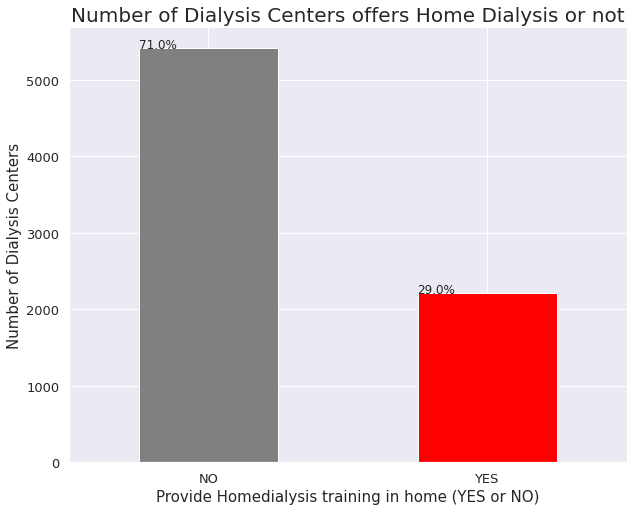

In [25]:
my_colors = list(islice(cycle(['grey','red']), None, len(df)))
ax = df.Offer_Home_dialysis.value_counts().plot(kind='bar', figsize=(10,8),color= my_colors, fontsize=13);
ax.set_xlabel('Provide Homedialysis training in home (YES or NO)', fontsize = '15')           # To set x axis label
ax.set_ylabel('Number of Dialysis Centers', fontsize = '15')  # To set y axis label
ax.set_title('Number of Dialysis Centers offers Home Dialysis or not', fontsize = '20')  # To set title 
totals = []
x=['NO','YES']
ax.set_xticklabels(x,rotation='horizontal')
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
     width, height = i.get_width(), i.get_height()
     x, y = i.get_xy() 
     ax.annotate('{:.01%}'.format(height/total), (x, y + height + 0.01))

**Yes, only 29% of dialysis centers offer homedialysis which supports my 3rd hypothesis statement.**

**Visualisation about Dialysis Centers which offer home dialysis based on state**

[]

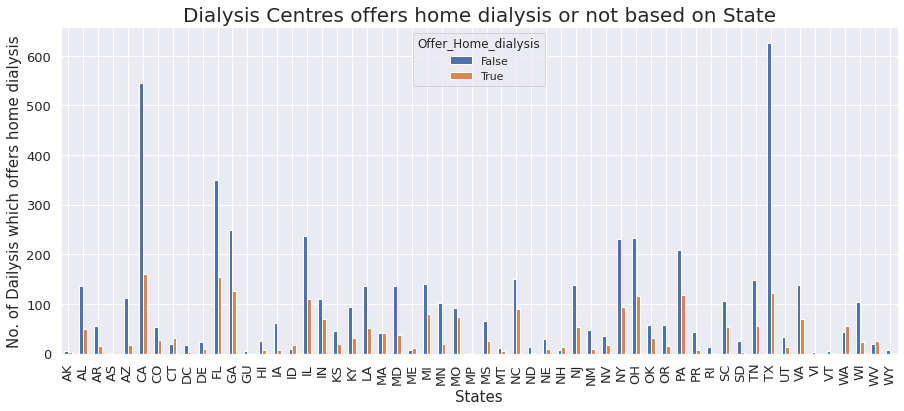

In [31]:
ax = data_1.plot(kind='bar',figsize=(15, 6), fontsize=13);
ax.set_xlabel('States', fontsize = '15')           # To set x axis label
ax.set_ylabel('No. of Dailysis which offers home dialysis', fontsize = '15')  # To set y axis label
ax.set_title('Dialysis Centres offers home dialysis or not based on State', fontsize = '20')  # To set title 
ax.plot()

**Hypothesis 4**: Around 25% of dialysis centres have five star ratings..

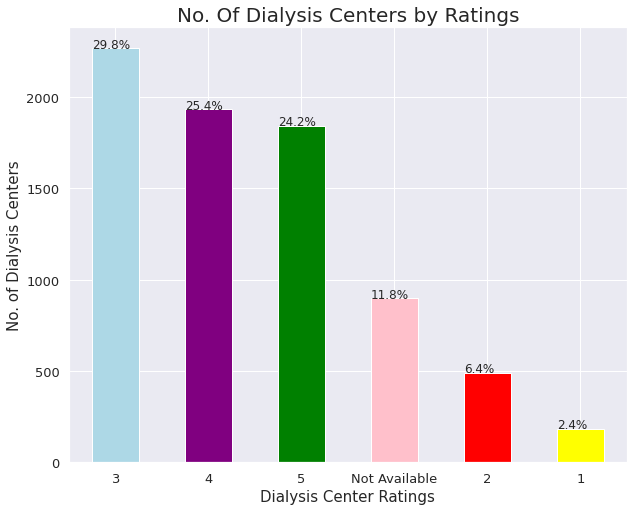

In [28]:
my_colors = list(islice(cycle(['lightblue', 'purple','green',"pink","red","yellow"]), None, len(df)))
ax = df.Five_Star.value_counts().plot(kind='bar', figsize=(10,8),color= my_colors, fontsize=13);
ax.set_xlabel('Dialysis Center Ratings', fontsize = '15')           # To set x axis label
ax.set_ylabel('No. of Dialysis Centers', fontsize = '15')  # To set y axis label
ax.set_title('No. Of Dialysis Centers by Ratings', fontsize = '20')  # To set title 
ax.set_xticklabels(ax.get_xticklabels(),rotation='horizontal')
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
     width, height = i.get_width(), i.get_height()
     x, y = i.get_xy() 
     ax.annotate('{:.01%}'.format(height/total), (x, y + height + 0.01))
